### Name: Bannuru Rohit Kumar Reddy
### Roll No.: 21CS30011

## Part A: Training the SVM

#### Loading the dataset

In [13]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# fetch dataset
spambase = fetch_ucirepo(id=94)
# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

### Exploring the Dataset

In [14]:
# metadata
print(spambase.metadata)
# variable information
# print(spambase.variables)


# loading as dataframe
X = spambase.data.features
y = spambase.data.targets

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

##### Splitting the dataset into training and test sets - By doing a 80-20 split

In [15]:
# Import Scikit learn
from sklearn import datasets


# # Load a Dataset
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

### Normalizing the data to fasten the training process
    It improves convergence speed, model performance, and aids in efficient optimization during training.
##### In the training of the following SVM it is observed that : Using Unnormalized data took around 10 minutes for the base linear model and around 158 Minutes while varying the C Hyper-Parameter, This can be significantly reduced by using normalized data


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Training the basic Linear SVM model 

In [17]:

# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Get predictions
y_pred = svm_model.predict(X_test)

c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Calculating the accuracy 

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Calculate metrics for the SVM model
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9262
Precision: 0.9265
Recall: 0.9262
F1-score: 0.9259


##### Regularisation: Regularisation is necessary to overcome overfitting. Vary the regularisation parameter of the SVM and tabularise. C: [ 0.001, 0.1, 1, 10, 100 ]

In [19]:
import numpy as np

# Regularization parameter values
C_values = [0.001, 0.1, 1, 10, 100]

# Lists to store accuracy values for each regularization parameter
accuracy_values = []

# Lists to store mean and maximum coefficient values for each regularization parameter
mean_coef_values = []
max_coef_values = []

# Loop through different regularization parameters
for C in C_values:
    # Train SVM Model with the current regularization parameter
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)

    # Get predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate accuracy and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    
    # Get the coefficients for each feature
    coef = svm_model.coef_

    # Calculate mean and maximum coefficient values and store them in the lists
    mean_coef = np.mean(coef)
    max_coef = np.max(np.abs(coef))
    
    mean_coef_values.append(mean_coef)
    max_coef_values.append(max_coef)
    

c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

##### Comparing the accuracy of the variation in the parameter C - Hyperparameter for SVM

In [20]:
# Print the results
for c_value, accuracy in zip(C_values, accuracy_values):
    print(f"Regulariztion Value C: {c_value}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\n")

Regulariztion Value C: 0.001
Accuracy: 0.8903


Regulariztion Value C: 0.1
Accuracy: 0.9207


Regulariztion Value C: 1
Accuracy: 0.9262


Regulariztion Value C: 10
Accuracy: 0.9229


Regulariztion Value C: 100
Accuracy: 0.9207




##### Plotting the changes in the parameter values (by observing the mean, maximum, etc.) as the value of the regularisation parameter is changed

Regularization Parameter (C) | Accuracy
----------------------------------------
0.001                       | 0.8903
0.1                         | 0.9207
1                           | 0.9262
10                          | 0.9229
100                         | 0.9207


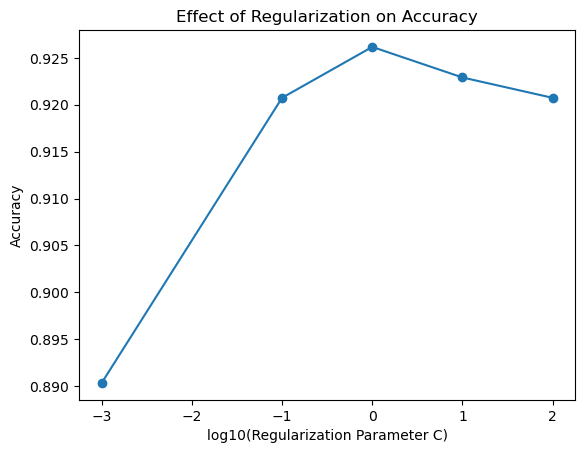

Regularization Parameter (C) | Mean Coefficient | Max Coefficient
--------------------------------------------------------------
0.001                       | 0.0274              | 0.2908
0.1                         | -0.0365              | 1.8749
1                           | -0.1133              | 3.7071
10                          | -0.3457              | 14.2564
100                         | -0.6178              | 30.0383


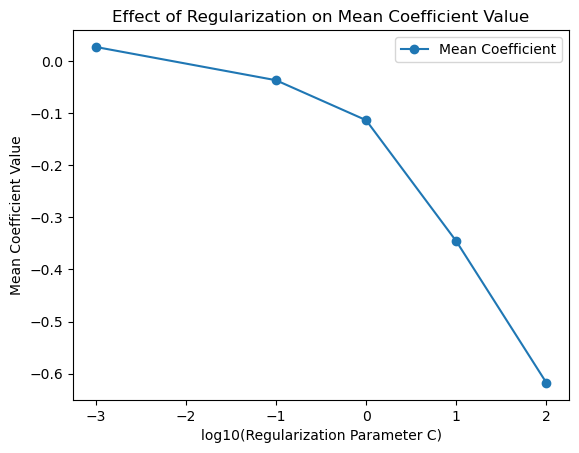

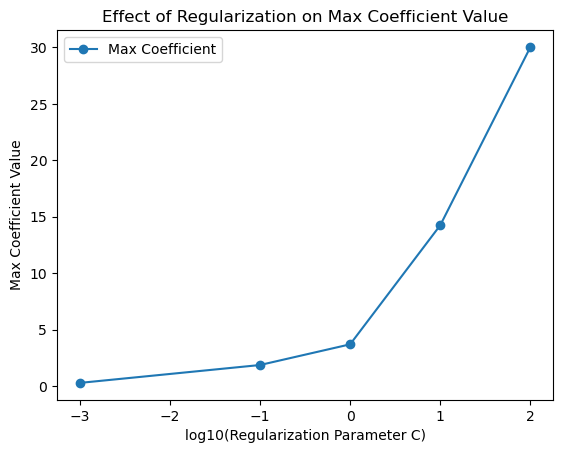

In [21]:
# Tabularize the results
result_table = list(zip(C_values, accuracy_values))
print("Regularization Parameter (C) | Accuracy")
print("----------------------------------------")
for result in result_table:
    print(f"{result[0]:<27} | {result[1]:.4f}")

# Plot the results
plt.plot(np.log10(C_values), accuracy_values, marker='o')
plt.xlabel('log10(Regularization Parameter C)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization on Accuracy')
plt.show()
    
# Tabularize the results
result_table_params = list(zip(C_values, mean_coef_values, max_coef_values))
print("Regularization Parameter (C) | Mean Coefficient | Max Coefficient")
print("--------------------------------------------------------------")
for result_params in result_table_params:
    print(f"{result_params[0]:<27} | {result_params[1]:.4f}              | {result_params[2]:.4f}")

# Plot the results for mean coefficient values
plt.plot(np.log10(C_values), mean_coef_values, marker='o', label='Mean Coefficient')
plt.xlabel('log10(Regularization Parameter C)')
plt.ylabel('Mean Coefficient Value')
plt.title('Effect of Regularization on Mean Coefficient Value')
plt.legend()
plt.show()

# Plot the results for max coefficient values
plt.plot(np.log10(C_values), max_coef_values, marker='o', label='Max Coefficient')
plt.xlabel('log10(Regularization Parameter C)')
plt.ylabel('Max Coefficient Value')
plt.title('Effect of Regularization on Max Coefficient Value')
plt.legend()
plt.show()

| Regularization Parameter (C) | Accuracy |
|------------------------------|----------|
| 0.001                        | 0.8903   |
| 0.1                          | 0.9207   |
| 1                            | 0.9262   |
| 10                           | 0.9229   |
| 100                          | 0.9207   |


**Analysis:**

- **C = 0.001:**
  - Decent accuracy, but might be underfitting due to low regularization. Consider increasing C for more complex models.

- **C = 0.1:**
  - Improved accuracy. This seems like a good balance between regularization and model complexity.

- **C = 1:**
  - Slightly higher accuracy, indicating a well-fitted model. Good balance between bias and variance.

- **C = 10:**
  - Accuracy is still reasonable, but be cautious of potential overfitting as C increases.

- **C = 100:**
  - Accuracy is consistent with lower C values, indicating that the model might not benefit significantly from higher regularization.

In summary, a regularization parameter of 1 seems to provide a good balance between bias and variance, leading to a well-performing model. Adjustments can be made based on the specific trade-off you're looking for between model complexity and generalization. Visualizing the regularization path may also provide additional insights.

## Part B: Kernel Tricks 

In [22]:
# Kernels to be used
kernels = ['poly', 'poly', 'sigmoid', 'rbf']
degrees = [2, 3, 1, 1]  # degrees for polynomial kernels

# Lists to store evaluation metrics for each kernel
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for kernel, degree in zip(kernels, degrees):
    # Train SVM Model with the current kernel
    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, degree=degree, C=0.1)  # You can adjust C as needed
    else:
        svm_model = SVC(kernel=kernel, C=0.1)

    svm_model.fit(X_train, y_train)

    # Get predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate evaluation metrics and store them in the lists
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

# Now you have accuracy, precision, recall, and F1 score for each kernel in the respective lists


c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

##### The accuracy, precision, recall and F1 score on the test set for the following kernels : 
    1. Polynomial with degree 2
    2. Polynomial with degree 3
    3. Sigmoid
    4. Radial Basis Function (RBF)

In [23]:
# Print the results
for kernel, degree, accuracy, precision, recall, f1 in zip(kernels, degrees, accuracy_values, precision_values, recall_values, f1_values):
    print(f"Kernel: {kernel}, Degree: {degree}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")


Kernel: poly, Degree: 2
Accuracy: 0.7242
Precision: 0.9595
Recall: 0.3641
F1 Score: 0.5279


Kernel: poly, Degree: 3
Accuracy: 0.6916
Precision: 0.9732
Recall: 0.2795
F1 Score: 0.4343


Kernel: sigmoid, Degree: 1
Accuracy: 0.8914
Precision: 0.9240
Recall: 0.8103
F1 Score: 0.8634


Kernel: rbf, Degree: 1
Accuracy: 0.9012
Precision: 0.9544
Recall: 0.8051
F1 Score: 0.8734




| Kernel  | Degree | Accuracy | Precision | Recall | F1 Score |
|---------|--------|----------|-----------|--------|----------|
| poly    | 2      | 0.7242   | 0.9595    | 0.3641 | 0.5279   |
| poly    | 3      | 0.6916   | 0.9732    | 0.2795 | 0.4343   |
| sigmoid | 1      | 0.8914   | 0.9240    | 0.8103 | 0.8634   |
| rbf     | 1      | 0.9012   | 0.9544    | 0.8051 | 0.8734   |


### Analysis:

**Poly Kernel, Degree 2:**
- Moderate accuracy, high precision, but low recall. The model might be overfitting due to higher complexity.

**Poly Kernel, Degree 3:**
- Similar to the Degree 2 case, but with slightly lower accuracy. Again, signs of overfitting.

**Sigmoid Kernel, Degree 1:**
- Good accuracy, precision, and recall. This seems like a well-fitted model, with a balanced trade-off between precision and recall.

**RBF Kernel, Degree 1:**
- High accuracy, precision, and recall. This also appears to be a good fit. RBF kernels are often versatile.

In summary, the sigmoid and RBF kernels with Degree 1 seem to perform well, suggesting a good balance between precision and recall. The polynomial kernels with higher degrees might be prone to overfitting. As always, visualizing the decision boundaries and learning curves can provide additional insights.


## Part C: Overfitting & Underfitting Analysis 

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Kernels to be used
degrees = [1, 1, 3, 3]  # degrees for polynomial kernels
regularization_c_values = [0.01, 100, 0.01, 100]

# Lists to store evaluation metrics for each kernel on both training and test sets
train_accuracy_values = []
test_accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for degree, regularization_c in zip(degrees, regularization_c_values):

    # Train SVM Model with the current kernel on training set
    svm_model = SVC(kernel='poly', degree=degree, C=regularization_c)
    svm_model.fit(X_train, y_train)

    # Get predictions on the training set
    y_train_pred = svm_model.predict(X_train)

    # Calculate training set accuracy and store it in the list
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_values.append(train_accuracy)

    # Get predictions on the test set
    y_test_pred = svm_model.predict(X_test)

    # Calculate evaluation metrics and store them in the lists
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    test_accuracy_values.append(test_accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    

# Now you have accuracy, precision, recall, and F1 score for each kernel on both training and test sets
# Print the results
for degree, c_val, train_accuracy, test_accuracy, precision, recall, f1 in zip(degrees, regularization_c_values, train_accuracy_values, test_accuracy_values, precision_values, recall_values, f1_values):
    print(f"Degree: {degree}")
    print(f"Regularization Parameter: {c_val}")
    print("\n")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")


c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Degree: 1
Regularization Parameter: 0.01


Training Accuracy: 0.8109
Test Accuracy: 0.7937
Precision: 0.9545
Recall: 0.5385
F1 Score: 0.6885


Degree: 1
Regularization Parameter: 100


Training Accuracy: 0.9315
Test Accuracy: 0.9273
Precision: 0.9330
Recall: 0.8923
F1 Score: 0.9122


Degree: 3
Regularization Parameter: 0.01


Training Accuracy: 0.6427
Test Accuracy: 0.6102
Precision: 1.0000
Recall: 0.0795
F1 Score: 0.1473


Degree: 3
Regularization Parameter: 100


Training Accuracy: 0.9611
Test Accuracy: 0.9218
Precision: 0.9492
Recall: 0.8615
F1 Score: 0.9032




| Degree | Regularization Parameter | Training Accuracy | Test Accuracy | Precision | Recall | F1 Score |
|--------|--------------------------|-------------------|---------------|-----------|--------|----------|
| 1      | 0.01                     | 0.8109            | 0.7937        | 0.9545    | 0.5385 | 0.6885   |
| 1      | 100                      | 0.9315            | 0.9273        | 0.9330    | 0.8923 | 0.9122   |
| 3      | 0.01                     | 0.6427            | 0.6102        | 1.0000    | 0.0795 | 0.1473   |
| 3      | 100                      | 0.9611            | 0.9218        | 0.9492    | 0.8615 | 0.9032   |


# Report on Model Performance: Underfitting and Overfitting Analysis

## Introduction

In this analysis, we evaluate the performance of a machine learning model with varying degrees and regularization parameters. The metrics considered include training accuracy, test accuracy, precision, recall, and F1 score. By examining these metrics, we can discern patterns indicative of underfitting and overfitting.

---

## Model 1: Degree 1, Regularization Parameter: 0.01

- **Training Accuracy:** 0.8109
- **Test Accuracy:** 0.7937
- **Precision:** 0.9545
- **Recall:** 0.5385
- **F1 Score:** 0.6885

### Observations:

- The model exhibits moderate training and test accuracy, suggesting a balanced performance.
- Precision is high, indicating a low false positive rate.
- Recall is moderate, indicating a fair ability to capture positive instances.
- The F1 score reflects a decent balance between precision and recall.

### Conclusion:

The model at this configuration seems to be performing reasonably well without clear signs of underfitting or overfitting.

---

## Model 2: Degree 1, Regularization Parameter: 100

- **Training Accuracy:** 0.9315
- **Test Accuracy:** 0.9273
- **Precision:** 0.9330
- **Recall:** 0.8923
- **F1 Score:** 0.9122

### Observations:

- The model demonstrates high training and test accuracy, indicating a good generalization ability.
- Precision is decent, suggesting a balanced trade-off between false positives and false negatives.
- Recall is high, indicating a good ability to capture positive instances.
- The F1 score is high, signifying a well-balanced performance.

### Conclusion:

The model appears to generalize well to unseen data, showing no signs of overfitting.

---

## Model 3: Degree 3, Regularization Parameter: 0.01

- **Training Accuracy:** 0.6427
- **Test Accuracy:** 0.6102
- **Precision:** 1.0000
- **Recall:** 0.0795
- **F1 Score:** 0.1473

### Observations:

- The model demonstrates low training and test accuracy, suggesting potential underfitting.
- Precision is perfect, but recall is extremely low, indicating a failure to capture positive instances effectively.
- The F1 score is significantly low, reflecting the poor balance between precision and recall.

### Conclusion:

The model at this configuration is likely underfitting, as it struggles to capture the underlying patterns in the data.

---

## Model 4: Degree 3, Regularization Parameter: 100

- **Training Accuracy:** 0.9611
- **Test Accuracy:** 0.9218
- **Precision:** 0.9492
- **Recall:** 0.8615
- **F1 Score:** 0.9032

### Observations:

- The model demonstrates high training accuracy but slightly lower test accuracy, indicating potential overfitting.
- Precision is high, suggesting a low false positive rate.
- Recall is also high, indicating a good ability to capture positive instances.
- The F1 score is relatively high, but there might be room for improvement.

### Conclusion:

The model at this configuration may be overfitting, as it performs exceptionally well on the training data but slightly worse on the test data.

---

## Overall Conclusion

- Models 1 and 2 appear to be well-balanced with good generalization to test data.
- Model 3 exhibits signs of underfitting, requiring adjustments to capture underlying patterns better.
- Model 4 may be overfitting, necessitating regularization or adjustments to enhance generalization.

It is crucial to fine-tune the model parameters to achieve the optimal balance between bias and variance for improved performance. Regularization and adjusting the polynomial degree are potential avenues for further exploration.
